In [1]:
import pandas as pd

#lacal path of data from my computer
body = r"C:\Users\Suat\Documents\Programming\Data Science Project\data.csv"

df = pd.read_csv(body)
df.head()



,borough,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,longitude,street_name,status
0,BROOKLYN,2015-11-23T10:29:49.000,DOOR/WINDOW,2015-11-07T10:16:55.000,397 1 STREET,11215.0,40.672571,-73.979307,1 STREET,Closed
1,MANHATTAN,2016-01-31T11:50:51.000,DOOR/WINDOW,2015-11-07T18:50:53.000,3851 BROADWAY,10032.0,40.836272,-73.943274,BROADWAY,Closed
2,MANHATTAN,2015-11-20T09:11:31.000,DOOR/WINDOW,2015-11-07T23:09:57.000,3851 BROADWAY,10032.0,40.836272,-73.943274,BROADWAY,Closed
3,BROOKLYN,2015-11-16T12:25:46.000,DOOR/WINDOW,2015-11-07T14:05:52.000,1555 NOSTRAND AVENUE,11226.0,40.648298,-73.949293,NOSTRAND AVENUE,Closed
4,BRONX,2015-12-03T09:38:12.000,DOOR/WINDOW,2015-11-06T13:02:50.000,1808 MULFORD AVENUE,10461.0,40.847490,-73.835112,MULFORD AVENUE,Closed


All files are imported

# Quick summary of Problem 1

In Problem 1, we found the most occured incident type from 311 Dataset, let's find it again and show on the
graph.

In [2]:
#what are the column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583182 entries, 0 to 5583181
Data columns (total 10 columns):
borough             object
closed_date         object
complaint_type      object
created_date        object
incident_address    object
incident_zip        float64
latitude            float64
longitude           float64
street_name         object
status              object
dtypes: float64(3), object(7)
memory usage: 426.0+ MB


In [3]:
#what are the complaint types
df["complaint_type"].unique()

array(['DOOR/WINDOW', 'SAFETY', 'HEAT/HOT WATER', 'PLUMBING', 'APPLIANCE',
       'UNSANITARY CONDITION', 'WATER LEAK', 'ELECTRIC',
       'FLOORING/STAIRS', 'ELEVATOR', 'GENERAL', 'PAINT/PLASTER',
       'OUTSIDE BUILDING', 'HPD Literature Request', 'AGENCY', 'HEATING',
       'NONCONST', 'GENERAL CONSTRUCTION', 'PAINT - PLASTER',
       'CONSTRUCTION', 'STRUCTURAL', 'VACANT APARTMENT'], dtype=object)

In [4]:
#complaint type counts
df["complaint_type"].value_counts()

HEAT/HOT WATER            1073045
HEATING                    887869
PLUMBING                   676178
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       393855
PAINT - PLASTER            361258
PAINT/PLASTER              313754
ELECTRIC                   290574
NONCONST                   260890
DOOR/WINDOW                181400
WATER LEAK                 169553
GENERAL                    133106
FLOORING/STAIRS            123799
APPLIANCE                  102478
HPD Literature Request      52738
SAFETY                      44550
OUTSIDE BUILDING             6551
ELEVATOR                     5610
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Name: complaint_type, dtype: int64

"New York City Open Data data file web site indicated that the complaint type "HEAT/HOT Water" was renamed from "HEATING" after 2014. So we should combine these two types into one."
I've learned this information from the example from Q1.

In [5]:
import numpy as np
df['complaint_type'] = np.where(df['complaint_type']=='HEATING','HEAT/HOT WATER',df['complaint_type'])

In [6]:
#new complaint type counts
df["complaint_type"].value_counts()

HEAT/HOT WATER            1960914
PLUMBING                   676178
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       393855
PAINT - PLASTER            361258
PAINT/PLASTER              313754
ELECTRIC                   290574
NONCONST                   260890
DOOR/WINDOW                181400
WATER LEAK                 169553
GENERAL                    133106
FLOORING/STAIRS            123799
APPLIANCE                  102478
HPD Literature Request      52738
SAFETY                      44550
OUTSIDE BUILDING             6551
ELEVATOR                     5610
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Name: complaint_type, dtype: int64

In [7]:
#let's see in a graph
import matplotlib.pyplot as plt
df["complaint_type"].value_counts().plot(kind='bar', figsize=(10, 6))
#
plt.xlabel('Complaint_Type') # add to x-label to the plot
plt.ylabel('Number occurance') # add y-label to the plot
plt.title('Complaint Type Graph') # add title to the plot
#
plt.show()

<Figure size 1000x600 with 1 Axes>

## Conclusion for Problem 1

HEAT/HOT WATER problem has been occured most since 2010!

#  PROBLEM 2 : What Areas Should the Agency Focus On?

Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

We identified the HEAT/HOT WATER problem as the most occured one itn the Question 1. So, lets start with making a new dataset contains borough, ZIP Code, street and complaint type.

In [8]:
Q2_df = df[["complaint_type", "borough", "street_name", "incident_zip"]]

In [9]:
Q2_df.head()

,complaint_type,borough,street_name,incident_zip
0,DOOR/WINDOW,BROOKLYN,1 STREET,11215.0
1,DOOR/WINDOW,MANHATTAN,BROADWAY,10032.0
2,DOOR/WINDOW,MANHATTAN,BROADWAY,10032.0
3,DOOR/WINDOW,BROOKLYN,NOSTRAND AVENUE,11226.0
4,DOOR/WINDOW,BRONX,MULFORD AVENUE,10461.0


In [10]:
##check if there are NaN variables
Q2_df.isnull().sum()

complaint_type        0
borough               0
street_name       52739
incident_zip      80945
dtype: int64

In [11]:
Q2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583182 entries, 0 to 5583181
Data columns (total 4 columns):
complaint_type    object
borough           object
street_name       object
incident_zip      float64
dtypes: float64(1), object(3)
memory usage: 170.4+ MB


In [12]:
##drop other complaint types other than Heat/Hot Water (most complaint type)
Q2_df = Q2_df[Q2_df.complaint_type == "HEAT/HOT WATER"]
Q2_df.head()

,complaint_type,borough,street_name,incident_zip
13,HEAT/HOT WATER,BRONX,TOWNSEND AVENUE,10452.0
14,HEAT/HOT WATER,BRONX,PROSPECT AVENUE,10459.0
165,HEAT/HOT WATER,BROOKLYN,GRAND AVENUE,11238.0
169,HEAT/HOT WATER,STATEN ISLAND,HOLLAND AVENUE,10303.0
170,HEAT/HOT WATER,BROOKLYN,LEE AVENUE,11206.0


Now we have a new dataframe Q2_df, which has only HEAT/HOT WATER incidents

In [13]:
#now, we can count for borough, street name and incident zip as follows;
Q2_df["borough"].value_counts()

BRONX            543108
BROOKLYN         518825
MANHATTAN        381347
Unspecified      282917
QUEENS           218027
STATEN ISLAND     16690
Name: borough, dtype: int64

BRONX is the borough which has the most HEAT/HOT WATER incident with 543108 incidents and BROOKLYN is following with 518825 incidents. Wait a second, what is that Unspecified?

In [14]:
Q2_df.loc[df['borough'] == "Unspecified"].head()

,complaint_type,borough,street_name,incident_zip
273645,HEAT/HOT WATER,Unspecified,MACE AVENUE,10467.0
273795,HEAT/HOT WATER,Unspecified,44 STREET,11220.0
273798,HEAT/HOT WATER,Unspecified,LINCOLN PLACE,11213.0
273950,HEAT/HOT WATER,Unspecified,BRONX BOULEVARD,10466.0
273965,HEAT/HOT WATER,Unspecified,CASE STREET,11373.0


These unspecfied values can be assigned the actual borough names because the street and zip is provided. However, I will do it right now, will be done later.

Let's see in a graph:

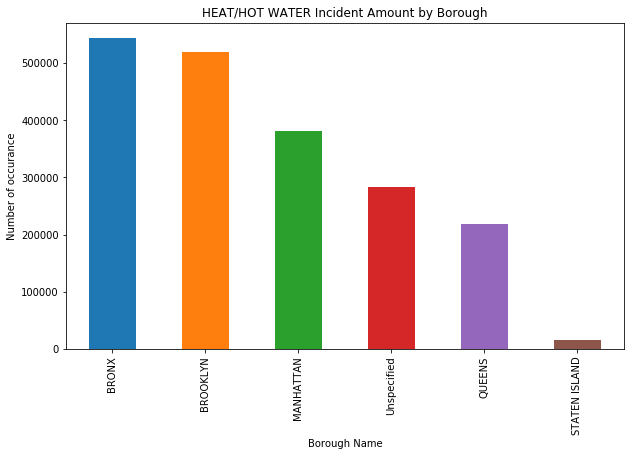

In [15]:
Q2_df["borough"].value_counts().plot(kind='bar', figsize=(10, 6))
#
plt.xlabel('Borough Name') # add to x-label to the plot
plt.ylabel('Number of occurance') # add y-label to the plot
plt.title('HEAT/HOT WATER Incident Amount by Borough') # add title to the plot
#
plt.show()

In [16]:
#finding the street where HEAT/HOT Water problem occured mostly
Q2_df["street_name"].value_counts().head()


GRAND CONCOURSE    34501
BROADWAY           22728
OCEAN AVENUE       17197
ARDEN STREET       15677
MORRIS AVENUE      15233
Name: street_name, dtype: int64

GRAND CONCOURSE is the street which has the most HEAT/HOT WATER incident with 34501 incidents.

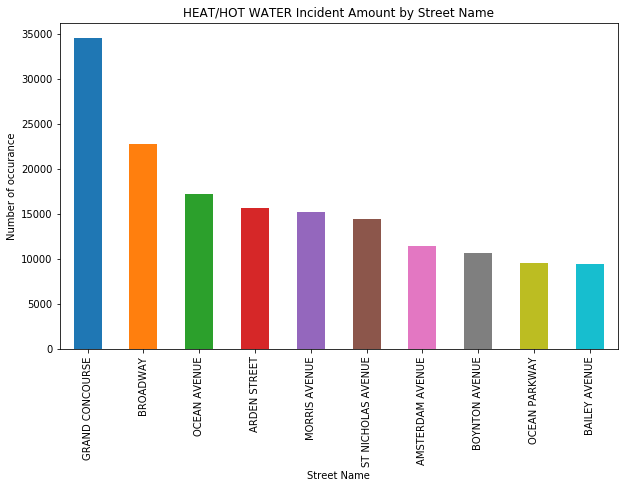

In [17]:
Q2_df["street_name"].value_counts().head(10).plot(kind='bar', figsize=(10, 6))
#
plt.xlabel('Street Name') # add to x-label to the plot
plt.ylabel('Number of occurance') # add y-label to the plot
plt.title('HEAT/HOT WATER Incident Amount by Street Name') # add title to the plot
#
plt.show()

In [18]:
#finding the zip number where HEAT/HOT Water problem occured mostly
Q2_df["incident_zip"].value_counts().head()

11226.0    62064
10467.0    60206
10458.0    59697
10453.0    52868
10468.0    52778
Name: incident_zip, dtype: int64

11226 is the Zip Code which has the most HEAT/HOT WATER incident with 62064 incidents

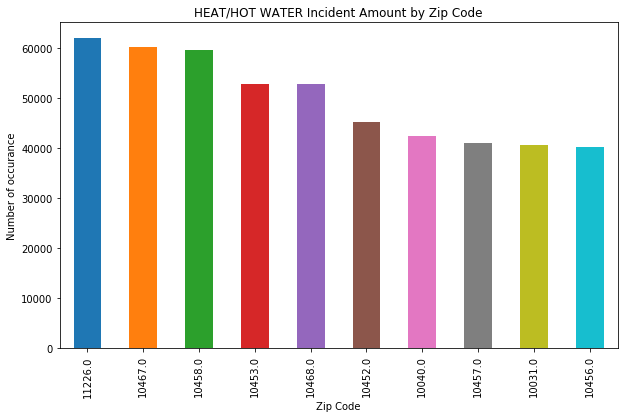

In [19]:
Q2_df["incident_zip"].value_counts().head(10).plot(kind='bar', figsize=(10, 6))
#
plt.xlabel('Zip Code') # add to x-label to the plot
plt.ylabel('Number of occurance') # add y-label to the plot
plt.title('HEAT/HOT WATER Incident Amount by Zip Code') # add title to the plot
#
plt.show()

We have found all answers for problem 2, however, let's continue for additional insights.

We know GRAND CONCOURSE is the street that HEAT/HOT WATER problem has occured most. But, where is GRAND CONCOURSE, in which borough or city? Let's find it and do the same thing for the ZIP code that we have just found above.

In [20]:
df.loc[df['street_name'] == "GRAND CONCOURSE"].head()

,borough,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,longitude,street_name,status
41,BRONX,2015-11-18T12:28:58.000,UNSANITARY CONDITION,2015-11-07T13:35:55.000,2760 GRAND CONCOURSE,10458.0,40.868369,-73.892614,GRAND CONCOURSE,Closed
83,BRONX,2015-11-23T10:45:37.000,UNSANITARY CONDITION,2015-11-07T03:03:12.000,1185 GRAND CONCOURSE,10452.0,40.833985,-73.918232,GRAND CONCOURSE,Closed
87,BRONX,2015-11-18T12:28:58.000,UNSANITARY CONDITION,2015-11-07T13:35:55.000,2760 GRAND CONCOURSE,10458.0,40.868369,-73.892614,GRAND CONCOURSE,Closed
192,BRONX,2015-11-08T12:52:50.000,HEAT/HOT WATER,2015-11-07T16:26:04.000,2351 GRAND CONCOURSE,10468.0,40.858889,-73.899100,GRAND CONCOURSE,Closed
205,BRONX,2015-11-11T01:11:15.000,HEAT/HOT WATER,2015-11-07T07:55:25.000,750 GRAND CONCOURSE,10451.0,40.823104,-73.924572,GRAND CONCOURSE,Closed


As we can clearly see, GRAND CONCOURSE is in BRONX

In [21]:
df.loc[df['incident_zip'] == 11226.0].head()

,borough,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,longitude,street_name,status
3,BROOKLYN,2015-11-16T12:25:46.000,DOOR/WINDOW,2015-11-07T14:05:52.000,1555 NOSTRAND AVENUE,11226.0,40.648298,-73.949293,NOSTRAND AVENUE,Closed
44,BROOKLYN,2015-11-18T17:45:08.000,UNSANITARY CONDITION,2015-11-07T14:08:58.000,1555 NOSTRAND AVENUE,11226.0,40.648298,-73.949293,NOSTRAND AVENUE,Closed
71,BROOKLYN,2015-11-23T10:29:49.000,UNSANITARY CONDITION,2015-11-06T16:23:37.000,543 EAST 21 STREET,11226.0,40.640831,-73.958191,EAST 21 STREET,Closed
73,BROOKLYN,2015-11-13T12:13:41.000,UNSANITARY CONDITION,2015-11-07T21:56:46.000,2505 BEDFORD AVENUE,11226.0,40.642215,-73.954443,BEDFORD AVENUE,Closed
104,BROOKLYN,2015-12-31T16:28:53.000,WATER LEAK,2015-11-06T14:30:34.000,15 CROOKE AVENUE,11226.0,40.651979,-73.964661,CROOKE AVENUE,Closed


Zip Code 11226 belongs to Brooklyn.

# CONCLUDING REMARKS

1. BRONX is the borough which has the most HEAT/HOT WATER incident with 543108 incidents and BROOKLYN is following with 518825 incidents.
2. GRAND CONCOURSE is the street which has the most HEAT/HOT WATER incident with 34501 incidents. GRAND CONCOURSE street is in BRONX
3. 11226 is the Zip Code which has the most HEAT/HOT WATER incident with 62064 incidents and it belongs to BROOKLYN